# Car insurance data analysis & modelling

In this project I will look at data that relates to behavioural characteristics of customers who have taken out car insurance. The data has been obfuscated with the exception of the field called 'target', which is an indicator to show which customers have claimed. The data stems from two separate systems, hence the need for two csv files. Please note that each row in ‘data1.csv’ corresponds to the same row number in the data2.csv file.

My task is to model the data with respect to the 'target' field and provide any other insights you may find within the data.

Note: "U" represents a missing value.

The data is categorical but we don't have any other supporting documentation.

## Import libraries

Let us first import the libraries we will need for analysis and developing our model.

In [ ]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

## Import data

In [ ]:
# Load the two csv files
car_insurance1_df = pd.read_csv("data1.csv")
car_insurance2_df = pd.read_csv("data2.csv")

In [ ]:
# Inspect first dataframe first new rows
car_insurance1_df.head()

,AB102,Target,AB104,AB105
0,112,1,F,H
1,80,1,B,B
2,U,1,B,D
3,28,1,L,H
4,70,1,D,H


In [ ]:
# Show some basic structure
car_insurance1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
AB102     10000 non-null object
Target    10000 non-null int64
AB104     10000 non-null object
AB105     10000 non-null object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
# Inspect second dataframe first new rows
car_insurance2_df.head()

,AB106,AB107,AB108,AB109,AB110,AB111,AB112,AB113,AB114,AB115,AB116,AB117,AB118,AB119
0,U,G,C,B,G,G,A,G,B,G,C,H,C,C
1,U,U,U,B,G,U,U,F,U,C,C,N,C,C
2,U,F,C,B,G,G,G,H,B,C,B,H,C,B
3,U,F,C,B,C,C,G,G,B,F,B,F,G,G
4,U,F,C,B,G,G,G,H,B,H,C,C,C,C


In [ ]:
# Show some basic structure
car_insurance2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
AB106    10000 non-null object
AB107    10000 non-null object
AB108    10000 non-null object
AB109    10000 non-null object
AB110    10000 non-null object
AB111    10000 non-null object
AB112    10000 non-null object
AB113    10000 non-null object
AB114    10000 non-null object
AB115    10000 non-null object
AB116    10000 non-null object
AB117    10000 non-null object
AB118    10000 non-null object
AB119    10000 non-null object
dtypes: object(14)
memory usage: 1.1+ MB


## Data wrangling & cleaning

### Merge dataframes

So we have been told that there is a one to one correspondance between the rows in each frame, so before going further lets merge the two frames into one on this basis.

In [ ]:
# Merge data frames
merged_df = pd.concat([car_insurance1_df, car_insurance2_df], axis=1)
# Print first few rows to check
merged_df.head()

,AB102,Target,AB104,AB105,AB106,AB107,AB108,AB109,AB110,AB111,AB112,AB113,AB114,AB115,AB116,AB117,AB118,AB119
0,112,1,F,H,U,G,C,B,G,G,A,G,B,G,C,H,C,C
1,80,1,B,B,U,U,U,B,G,U,U,F,U,C,C,N,C,C
2,U,1,B,D,U,F,C,B,G,G,G,H,B,C,B,H,C,B
3,28,1,L,H,U,F,C,B,C,C,G,G,B,F,B,F,G,G
4,70,1,D,H,U,F,C,B,G,G,G,H,B,H,C,C,C,C


### Missing values

We have also been told that 'U' signifies a missing value, lets replace these with proper pandas nans.

In [ ]:
# Replace 'U' with pandas nan
car_insurance_df = merged_df.replace('U', np.nan)
# Print first few rows to check
car_insurance_df.head()

,AB102,Target,AB104,AB105,AB106,AB107,AB108,AB109,AB110,AB111,AB112,AB113,AB114,AB115,AB116,AB117,AB118,AB119
0,112,1,F,H,NaN,G,C,B,G,G,A,G,B,G,C,H,C,C
1,80,1,B,B,NaN,NaN,NaN,B,G,NaN,NaN,F,NaN,C,C,N,C,C
2,NaN,1,B,D,NaN,F,C,B,G,G,G,H,B,C,B,H,C,B
3,28,1,L,H,NaN,F,C,B,C,C,G,G,B,F,B,F,G,G
4,70,1,D,H,NaN,F,C,B,G,G,G,H,B,H,C,C,C,C


Lets now get a sense of how many missing values we have overall.

In [ ]:
car_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
AB102     7873 non-null object
Target    10000 non-null int64
AB104     9992 non-null object
AB105     10000 non-null object
AB106     3269 non-null object
AB107     9826 non-null object
AB108     9826 non-null object
AB109     9716 non-null object
AB110     10000 non-null object
AB111     8634 non-null object
AB112     9166 non-null object
AB113     9716 non-null object
AB114     9359 non-null object
AB115     9998 non-null object
AB116     10000 non-null object
AB117     10000 non-null object
AB118     10000 non-null object
AB119     9052 non-null object
dtypes: int64(1), object(17)
memory usage: 1.4+ MB


In [ ]:
# Convert to int column
car_insurance_df['AB102'] = car_insurance_df['AB102'].astype('float')

AB106 only has 3269 non-null values, if we drop all rows with nans we will loose 2/3 of our dataset. 

AB102 only has 7873 non-null values, if we drop all rows with nans we will loose 1/3 of our dataset. 

These might be good columns to drop.

Before we do lets just compare the distribution of values between the claims and no_claims groups for these features we are about to drop.

In [ ]:
# Create claims & no-claims sub-groups
claims_df = car_insurance_df[car_insurance_df['Target'] == 1]
noclaims_df = car_insurance_df[car_insurance_df['Target'] == 0]
# Save exploratory df
exploratory_df = car_insurance_df.copy()

In [ ]:
# Define function to compare column between claims & no-claims groups
def compare_columns_claims(column):
    
    # Create shared ordering
    unique_values = car_insurance_df[column].unique()
    
    # Plot comparison bar charts
    fig = plt.figure(figsize=(16,5))
    plot1 = fig.add_subplot(121)
    plot1.title.set_text('Claims')
    sns.countplot(claims_df[column], order=unique_values)

    plot2 = fig.add_subplot(122)
    plot2.title.set_text('No Claims')
    sns.countplot(noclaims_df[column], order=unique_values)

    fig.suptitle(column)
    plt.show()

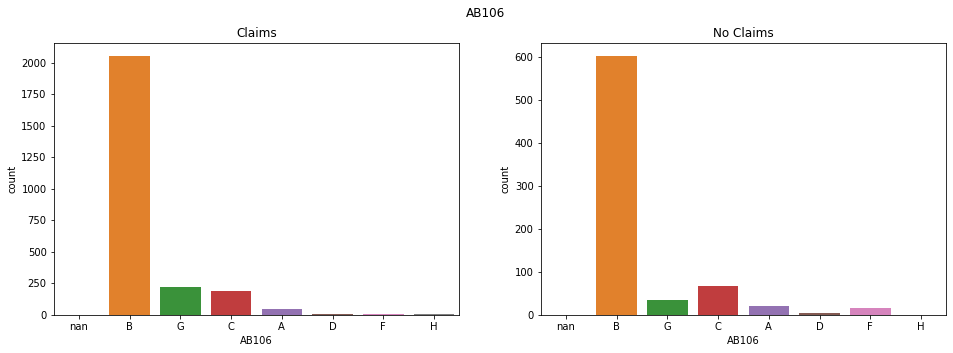

In [ ]:
# Compare distribution of values for AB106
compare_columns_claims('AB106')

Seem to be no major difference in the distribution of values for these groups.

Lets look at the distribution of values for our numerical feature AB102

In [ ]:
# 5 number summary
car_insurance_df['AB102'].describe()

count    7873.000000
mean       84.426648
std        27.804371
min        24.000000
25%        69.000000
50%        92.000000
75%       103.000000
max       138.000000
Name: AB102, dtype: float64

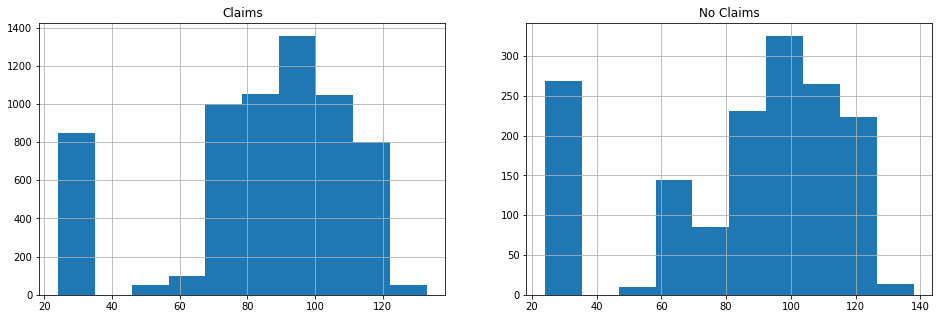

In [ ]:
# Compare distributions
fig = plt.figure(figsize=(16,5))

plot1 = fig.add_subplot(121)
plot1.title.set_text('Claims')
claims_df['AB102'].hist()

plot2 = fig.add_subplot(122)
plot2.title.set_text('No Claims')
noclaims_df['AB102'].hist()

plt.show()

This also has a very similar distribution - so we can drop these columns knowing these do not seem to be significant predictors of claims.

In [ ]:
# Drop columns AB102 & AB106
car_insurance_df = car_insurance_df.drop(columns=['AB102', 'AB106'])
# Check missing values again
car_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
Target    10000 non-null int64
AB104     9992 non-null object
AB105     10000 non-null object
AB107     9826 non-null object
AB108     9826 non-null object
AB109     9716 non-null object
AB110     10000 non-null object
AB111     8634 non-null object
AB112     9166 non-null object
AB113     9716 non-null object
AB114     9359 non-null object
AB115     9998 non-null object
AB116     10000 non-null object
AB117     10000 non-null object
AB118     10000 non-null object
AB119     9052 non-null object
dtypes: int64(1), object(15)
memory usage: 1.2+ MB


In [ ]:
# Drop all nan values
car_insurance_df = car_insurance_df.dropna()
# Check missing values again
car_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7525 entries, 0 to 9998
Data columns (total 16 columns):
Target    7525 non-null int64
AB104     7525 non-null object
AB105     7525 non-null object
AB107     7525 non-null object
AB108     7525 non-null object
AB109     7525 non-null object
AB110     7525 non-null object
AB111     7525 non-null object
AB112     7525 non-null object
AB113     7525 non-null object
AB114     7525 non-null object
AB115     7525 non-null object
AB116     7525 non-null object
AB117     7525 non-null object
AB118     7525 non-null object
AB119     7525 non-null object
dtypes: int64(1), object(15)
memory usage: 999.4+ KB


### Check for duplicate rows

In [ ]:
# Check number of duplicates
sum(car_insurance_df.duplicated())

55

Ok lets drop these duplcate rows

In [ ]:
# drop duplicates
car_insurance_df = car_insurance_df.drop_duplicates()
# Check number of duplicates again
sum(car_insurance_df.duplicated())

0

In [ ]:
# Check remaining rows
car_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7470 entries, 0 to 9998
Data columns (total 16 columns):
Target    7470 non-null int64
AB104     7470 non-null object
AB105     7470 non-null object
AB107     7470 non-null object
AB108     7470 non-null object
AB109     7470 non-null object
AB110     7470 non-null object
AB111     7470 non-null object
AB112     7470 non-null object
AB113     7470 non-null object
AB114     7470 non-null object
AB115     7470 non-null object
AB116     7470 non-null object
AB117     7470 non-null object
AB118     7470 non-null object
AB119     7470 non-null object
dtypes: int64(1), object(15)
memory usage: 992.1+ KB


## Exploratory data analysis

Let's compare the distribution of values for each of our categorical features, comparing the claims & no-claims sub-groups, to understand & identify interesting features.

In [ ]:
# Create claims & no-claims sub-groups
claims_df = car_insurance_df[car_insurance_df['Target'] == 1]
noclaims_df = car_insurance_df[car_insurance_df['Target'] == 0]

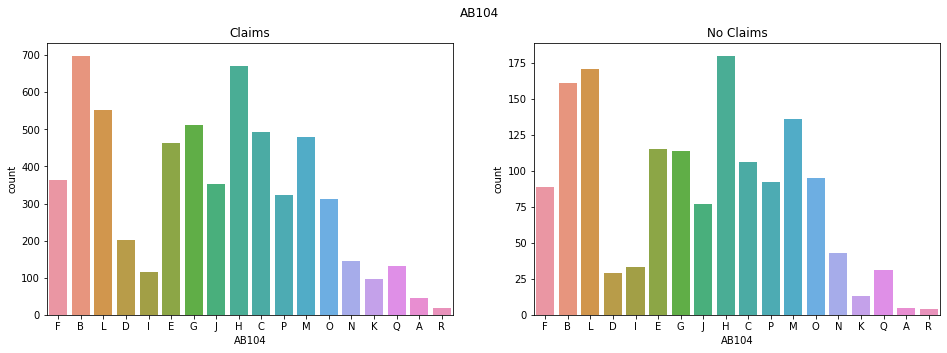

In [ ]:
# Compare distribution of values for AB104
compare_columns_claims('AB104')

Hard to tell but there could be a small difference in distribution - lets keep.

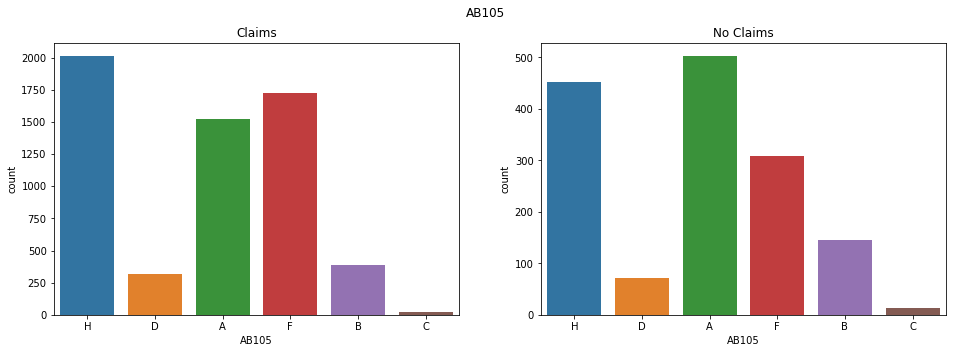

In [ ]:
# Compare distribution of values for AB105
compare_columns_claims('AB105')

A small difference in distribution, lets keep.

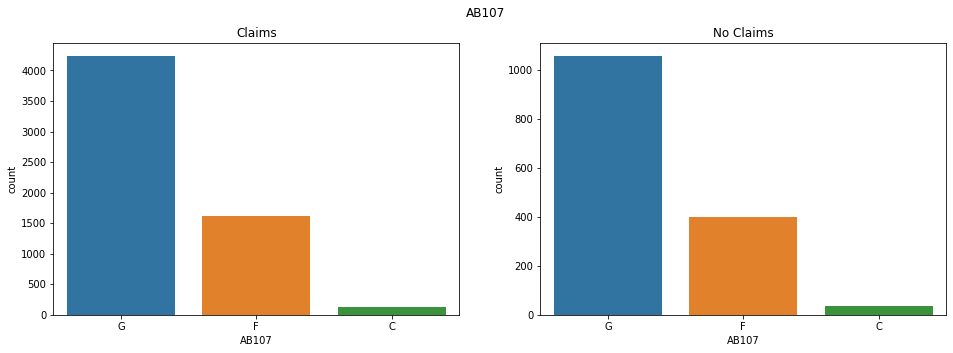

In [ ]:
# Compare distribution of values for AB107
compare_columns_claims('AB107')

Very similar distributions, lets drop.

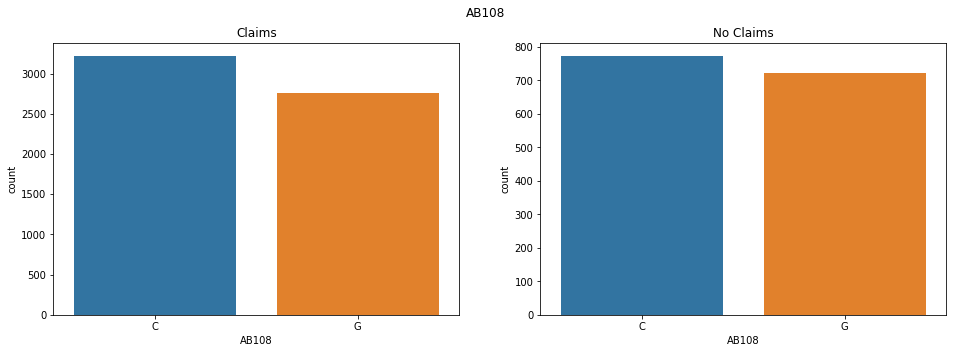

In [ ]:
# Compare distribution of values for AB108
compare_columns_claims('AB108')

Very similar distributions, lets drop.

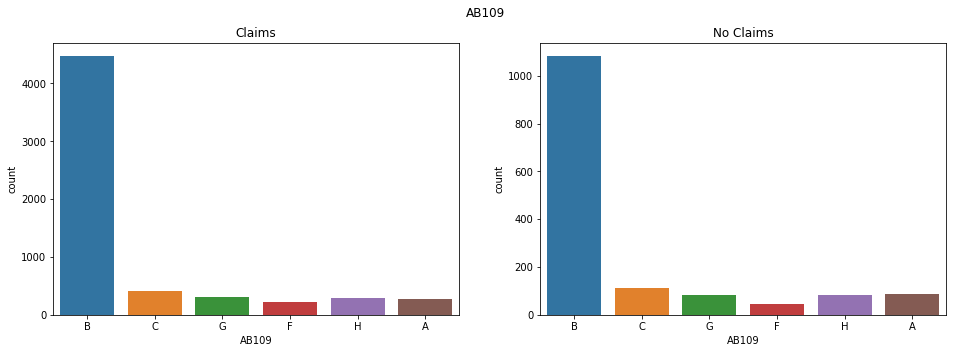

In [ ]:
# Compare distribution of values for AB109
compare_columns_claims('AB109')

Very similar distributions, lets drop.

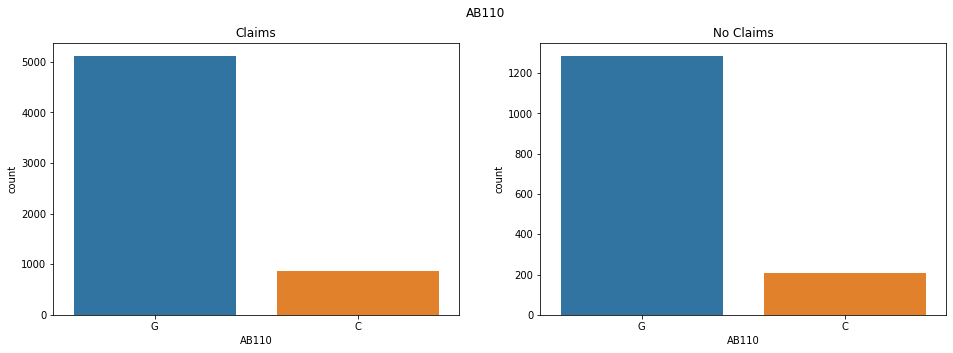

In [ ]:
# Compare distribution of values for AB110
compare_columns_claims('AB110')

Very similar distributions, lets drop.

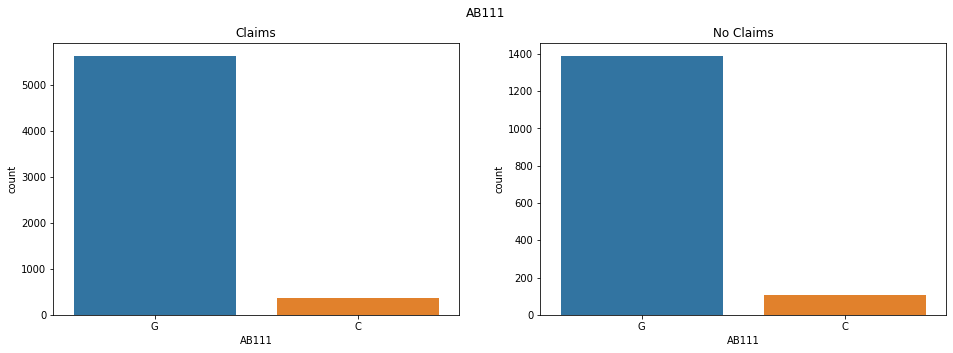

In [ ]:
# Compare distribution of values for AB111
compare_columns_claims('AB111')

Very similar distributions, lets drop.

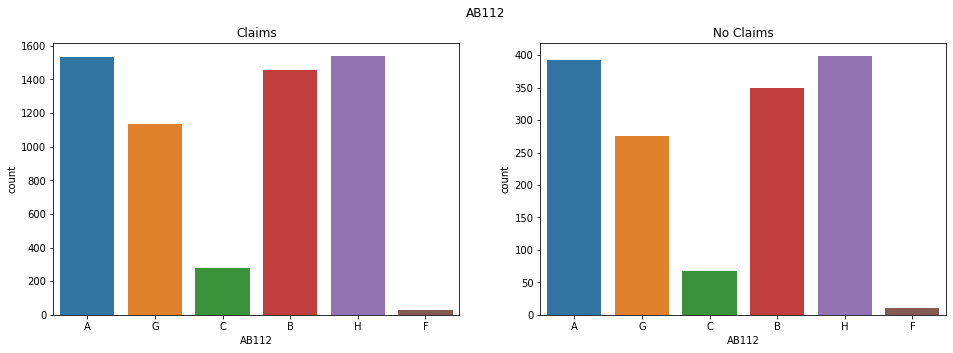

In [ ]:
# Compare distribution of values for AB112
compare_columns_claims('AB112')

Very similar distributions, lets drop.

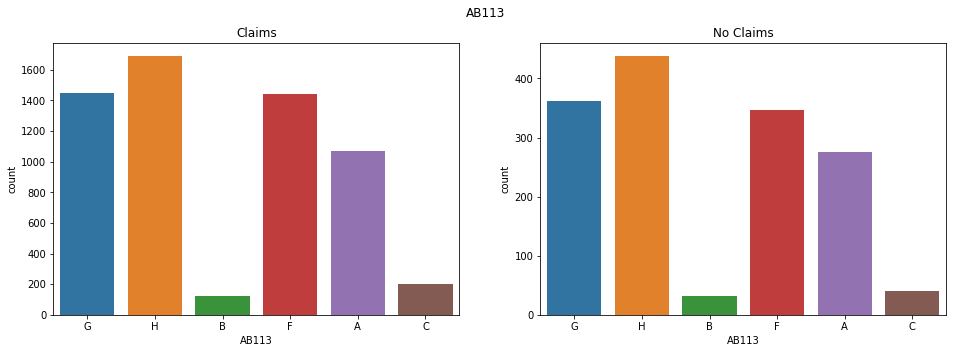

In [ ]:
# Compare distribution of values for AB113
compare_columns_claims('AB113')

Very similar distributions, lets drop.

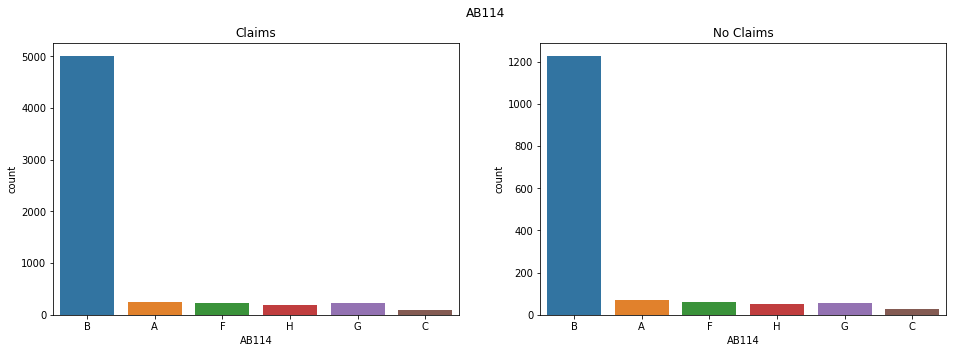

In [ ]:
# Compare distribution of values for AB114
compare_columns_claims('AB114')

Very similar distributions, lets drop.

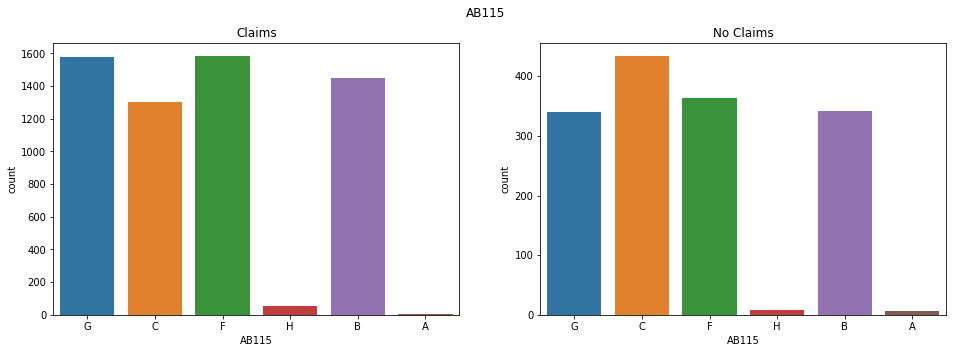

In [ ]:
# Compare distribution of values for AB115
compare_columns_claims('AB115')

A small difference in distribution, lets keep.

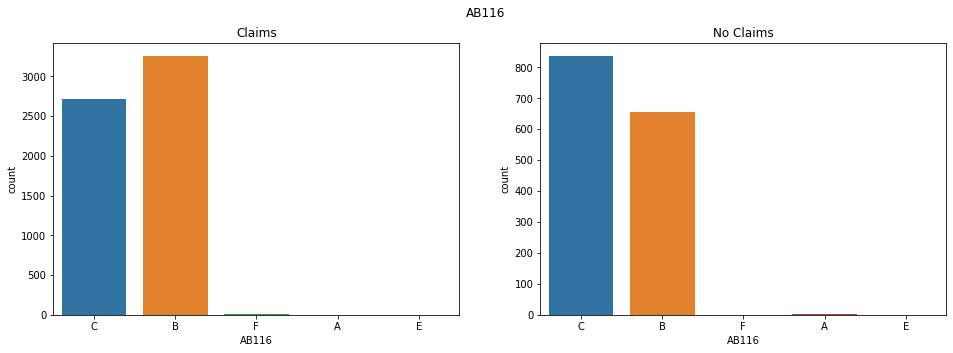

In [ ]:
# Compare distribution of values for AB116
compare_columns_claims('AB116')

A small difference in distribution, lets keep.

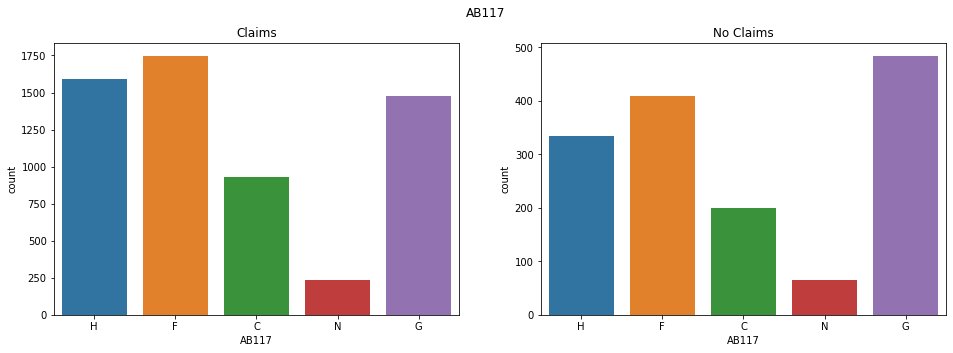

In [ ]:
# Compare distribution of values for AB117
compare_columns_claims('AB117')

A small difference in distribution, lets keep.

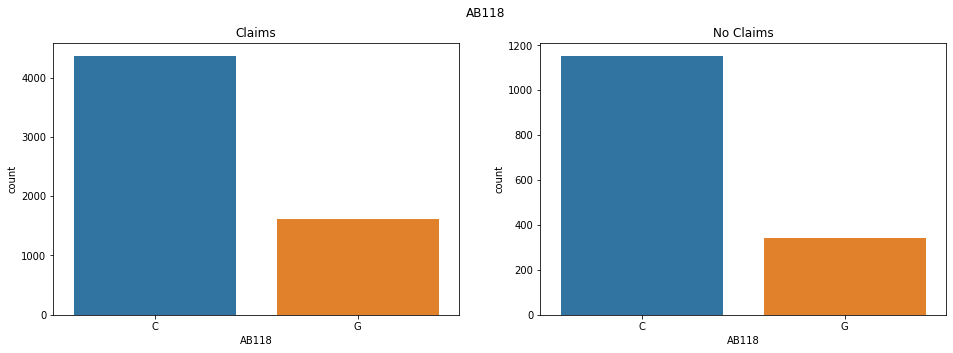

In [ ]:
# Compare distribution of values for AB118
compare_columns_claims('AB118')

Very similar distributions, lets drop.

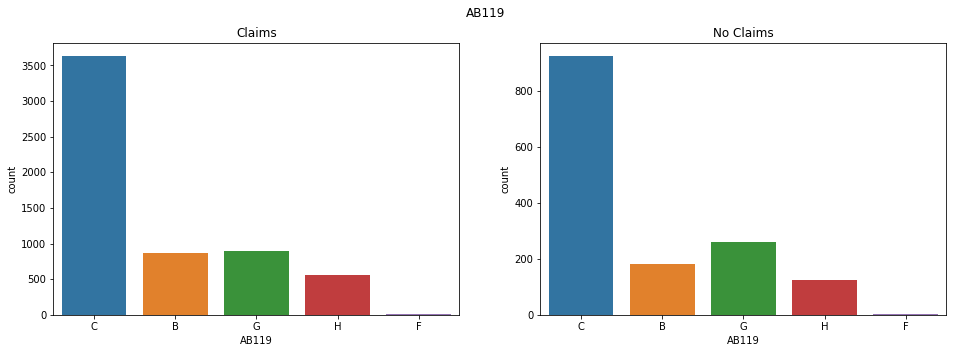

In [ ]:
# Compare distribution of values for AB119
compare_columns_claims('AB119')

Very similar distributions, lets drop.

### Most promising features from exploratory analysis

- AB104
- AB105_A
- AB105_F
- AB116_G
- AB116_C
- AB116_F
- AB117_H
- AB117_F
- AB117_G

## Prepare data for modelling

### Encode categorical features

Let us examime the values of our categorical features.

In [ ]:
car_insurance_df['AB104'].unique()

array(['F', 'B', 'L', 'D', 'I', 'E', 'G', 'J', 'H', 'C', 'P', 'M', 'O',
       'N', 'K', 'Q', 'A', 'R'], dtype=object)

In [ ]:
car_insurance_df['AB105'].unique()

array(['H', 'D', 'A', 'F', 'B', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB107'].unique()

array(['G', 'F', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB108'].unique()

array(['C', 'G'], dtype=object)

In [ ]:
car_insurance_df['AB109'].unique()

array(['B', 'C', 'G', 'F', 'H', 'A'], dtype=object)

In [ ]:
car_insurance_df['AB110'].unique()

array(['G', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB111'].unique()

array(['G', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB112'].unique()

array(['A', 'G', 'C', 'B', 'H', 'F'], dtype=object)

In [ ]:
car_insurance_df['AB113'].unique()

array(['G', 'H', 'B', 'F', 'A', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB114'].unique()

array(['B', 'A', 'F', 'H', 'G', 'C'], dtype=object)

In [ ]:
car_insurance_df['AB115'].unique()

array(['G', 'C', 'F', 'H', 'B', 'A'], dtype=object)

In [ ]:
car_insurance_df['AB116'].unique()

array(['C', 'B', 'F', 'A', 'E'], dtype=object)

In [ ]:
car_insurance_df['AB117'].unique()

array(['H', 'F', 'C', 'N', 'G'], dtype=object)

In [ ]:
car_insurance_df['AB118'].unique()

array(['C', 'G'], dtype=object)

In [ ]:
car_insurance_df['AB119'].unique()

array(['C', 'B', 'G', 'H', 'F'], dtype=object)

Ok so these have a range of categorical values. We do not know if they are ordinal or not, so lets treat as independant and convert to numeric dummy variables.

Lets now convert each of these into a set of dummy variables.

In [ ]:
# Save copy of pre-encoded values
no_dummies_df = car_insurance_df.copy()
# Create dictionary of key value pairs of category -> redundant_dummy
categories = {'AB104':'A', 'AB105':'A', 'AB107':'C', 'AB108':'C', 'AB109':'A', 'AB110':'C', 'AB111':'C', 'AB112':'A', 
    'AB113':'A', 'AB114':'A', 'AB115':'A', 'AB116':'A', 'AB117':'C', 'AB118':'C', 'AB119':'B'}

# Create all dummy variables
# For each categorical variable
for feature, redundant_dummy in categories.items(): 
    # Get dummy vars
    dummy_vars = pd.get_dummies(car_insurance_df[feature], prefix=feature)
    # Merge into main df
    car_insurance_df = pd.concat([car_insurance_df, dummy_vars], axis=1)
    # Create redundant dummy feature
    redundant_dummy_feature = feature + '_' + redundant_dummy
    # Drop original feature plus one dummy variable which is redundant
    car_insurance_df = car_insurance_df.drop(columns=[feature, redundant_dummy_feature])
    
# Show first few rows
car_insurance_df.head()

,Target,AB104_B,AB104_C,AB104_D,AB104_E,AB104_F,AB104_G,AB104_H,AB104_I,AB104_J,...,AB116_F,AB117_F,AB117_G,AB117_H,AB117_N,AB118_G,AB119_C,AB119_F,AB119_G,AB119_H
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Show all remaining columns
print(car_insurance_df.columns)
print(len(car_insurance_df.columns))

Index(['Target', 'AB104_B', 'AB104_C', 'AB104_D', 'AB104_E', 'AB104_F',
       'AB104_G', 'AB104_H', 'AB104_I', 'AB104_J', 'AB104_K', 'AB104_L',
       'AB104_M', 'AB104_N', 'AB104_O', 'AB104_P', 'AB104_Q', 'AB104_R',
       'AB105_B', 'AB105_C', 'AB105_D', 'AB105_F', 'AB105_H', 'AB107_F',
       'AB107_G', 'AB108_G', 'AB109_B', 'AB109_C', 'AB109_F', 'AB109_G',
       'AB109_H', 'AB110_G', 'AB111_G', 'AB112_B', 'AB112_C', 'AB112_F',
       'AB112_G', 'AB112_H', 'AB113_B', 'AB113_C', 'AB113_F', 'AB113_G',
       'AB113_H', 'AB114_B', 'AB114_C', 'AB114_F', 'AB114_G', 'AB114_H',
       'AB115_B', 'AB115_C', 'AB115_F', 'AB115_G', 'AB115_H', 'AB116_B',
       'AB116_C', 'AB116_E', 'AB116_F', 'AB117_F', 'AB117_G', 'AB117_H',
       'AB117_N', 'AB118_G', 'AB119_C', 'AB119_F', 'AB119_G', 'AB119_H'],
      dtype='object')
66


### Further explore variance of dataset with t-sne modelling

I will use t-SNE on this dataset to reduce the dimensionality to 2 dimensions, and then plot these on scatterplots dividing the data into claims & no-claims sub-groups, to see how the values between these sub-groups compare, and see if we can get a better overall picture of how similar or different these sub-groups are.

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(car_insurance_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7470 samples in 0.129s...
[t-SNE] Computed neighbors for 7470 samples in 12.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7470
[t-SNE] Computed conditional probabilities for sample 2000 / 7470
[t-SNE] Computed conditional probabilities for sample 3000 / 7470
[t-SNE] Computed conditional probabilities for sample 4000 / 7470
[t-SNE] Computed conditional probabilities for sample 5000 / 7470
[t-SNE] Computed conditional probabilities for sample 6000 / 7470
[t-SNE] Computed conditional probabilities for sample 7000 / 7470
[t-SNE] Computed conditional probabilities for sample 7470 / 7470
[t-SNE] Mean sigma: 0.895135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.139519
[t-SNE] KL divergence after 300 iterations: 3.533887


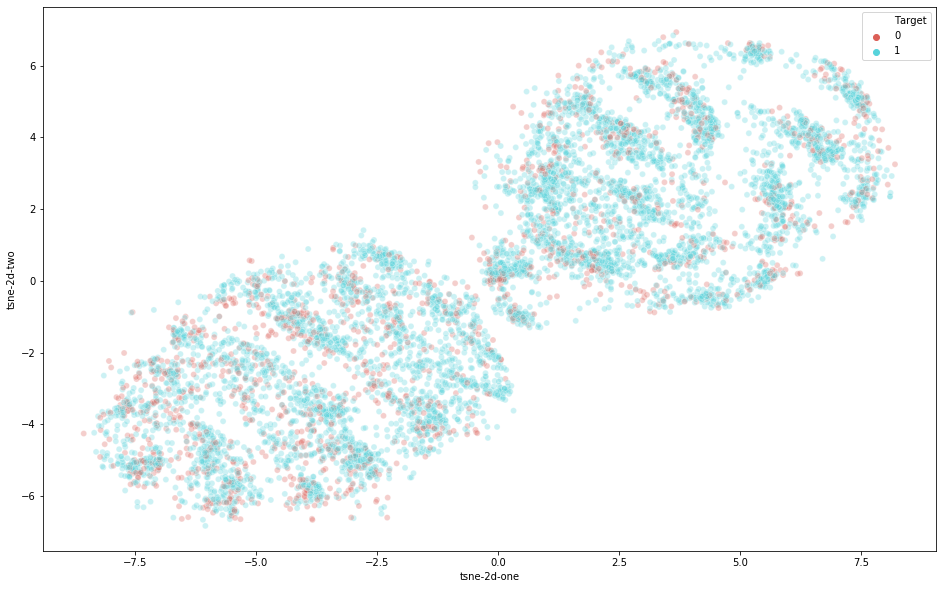

In [ ]:
# Plot dataset with 2 t-SNE features, using same colour for data for claims v no claims
tsne_df = car_insurance_df
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Target",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

In [ ]:
# Drop t-sne columns
car_insurance_df = car_insurance_df.drop(columns=['tsne-2d-one', 'tsne-2d-two'])


**Based on the above analysis, I am very skeptical that any predictive modelling on the target variable will be sucessful! The two target classes literally seem inseperable.**


### Check target variable

The target variable should be binary and representing if there was a claim or no claim for car insurance, lets examine it.

In [ ]:
# Check values are 1 & 0 only
car_insurance_df['Target'].unique()

array([1, 0])

In [ ]:
# Check proportions of each
car_insurance_df['Target'].value_counts()

1    5976
0    1494
Name: Target, dtype: int64

In [ ]:
# Percentage of customers that claimed
(5976/car_insurance_df.shape[0]) * 100

80.0

In [ ]:
# Percentage of customers that did not claim
(1494/car_insurance_df.shape[0]) * 100

20.0

This seems very high, lets check the original before we started cleaning

In [ ]:
# Check proportions of each
merged_df['Target'].value_counts()

1    8000
0    2000
Name: Target, dtype: int64

This seems consistant with the original uncleaned data - that 80% of policies claimed.

### Chi-Square test to select promising features

This is a statistical test to measure the independance of categorical variables. We can use this to compare our features to our target variables, and then identify the features that seem most related to our target.

In [ ]:
# Split features and target variables
X_all = car_insurance_df.drop(columns=['Target'])
y = car_insurance_df['Target']

Feature 0: 0.848661
Feature 1: 1.987062
Feature 2: 8.156250
Feature 3: 0.006908
Feature 4: 0.027102
Feature 5: 1.210000
Feature 6: 0.676056
Feature 7: 0.488176
Feature 8: 1.227378
Feature 9: 4.602273
Feature 10: 6.024896
Feature 11: 1.662338
Feature 12: 0.894180
Feature 13: 2.840295
Feature 14: 1.277778
Feature 15: 0.075617
Feature 16: 0.011905
Feature 17: 17.719397
Feature 18: 9.322581
Feature 19: 0.437824
Feature 20: 29.284801
Feature 21: 4.262170
Feature 22: 0.065698
Feature 23: 0.001180
Feature 24: 1.178027
Feature 25: 0.932542
Feature 26: 0.511748
Feature 27: 0.796402
Feature 28: 0.373057
Feature 29: 1.024933
Feature 30: 0.020658
Feature 31: 0.164954
Feature 32: 0.481067
Feature 33: 0.026012
Feature 34: 0.493902
Feature 35: 0.229624
Feature 36: 0.404332
Feature 37: 0.105263
Feature 38: 1.902263
Feature 39: 0.407490
Feature 40: 0.004970
Feature 41: 0.436942
Feature 42: 0.361868
Feature 43: 1.070796
Feature 44: 0.321174
Feature 45: 0.014337
Feature 46: 0.546488
Feature 47: 0.872135


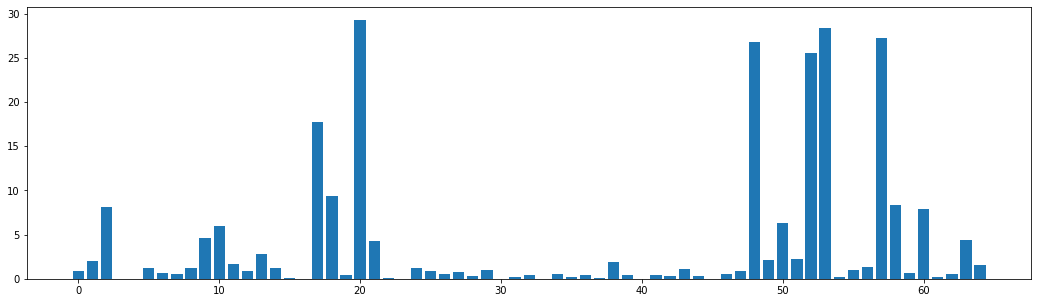

In [ ]:
# Lets explore the chi-squared values for all features with respect to our target
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_all, y)
X_all_fs = fs.transform(X_all)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
f, ax = plt.subplots(figsize=(18,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
# Lets select the top 5 features
top_selector = SelectKBest(score_func=chi2, k=5)
top_selector.fit(X_all, y)
# Get top features to keep
cols = top_selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
X_chiSquared = X_all.iloc[: , cols]
# Print feature numbers and names
print(cols)
print(X_chiSquared.columns)

[20 48 52 53 57]
Index(['AB105_F', 'AB115_C', 'AB116_B', 'AB116_C', 'AB117_G'], dtype='object')


## Naive predictor

So lets define a baseline for our model, if we define a naive predictor that always predicts 1 for a claim, this would give us 80% accuracy as the baseline for our naive predictor which we hope to do better than.

In [ ]:
# Naive predictor
'''
TP = np.sum(car_insurance_df['Target']) # Counting the ones as this is the naive case. 
FP = car_insurance_df['Target'].count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# Calculate accuracy, precision and recall
accuracy = np.sum(car_insurance_df['Target']) / car_insurance_df.shape[0]
recall = 1
precision = accuracy

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta_squared = 0.5 * 0.5
fscore = (1 + beta_squared) * ((precision * recall) / ((beta_squared * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.8000, F-score: 0.8333]


## Predictive Modelling Part 1 - All features

### Split data into train & test

In [ ]:
# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2, random_state = 0)

### Modelling

In [ ]:
# Define function that will act as pipeline for training and testing our models (and returning the results)
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time.time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
# Define function that will take the results of our model training & testing and plot the results
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (13,9))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["10%", "50%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
     # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [ ]:
# Initialize the three models
clf_A = linear_model.LogisticRegression()
clf_B = GaussianNB()
clf_C = GradientBoostingClassifier()

# Calculate the number of samples for 10%, 50% and 100% of the training data
samples_100 = len(y_train)
samples_50 = int((samples_100 / 100) * 50)
samples_10 = int((samples_100 / 100) * 10)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 597 samples.
LogisticRegression trained on 2988 samples.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 5976 samples.
GaussianNB trained on 597 samples.
GaussianNB trained on 2988 samples.
GaussianNB trained on 5976 samples.
GradientBoostingClassifier trained on 597 samples.
GradientBoostingClassifier trained on 2988 samples.
GradientBoostingClassifier trained on 5976 samples.


### Evaluate

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


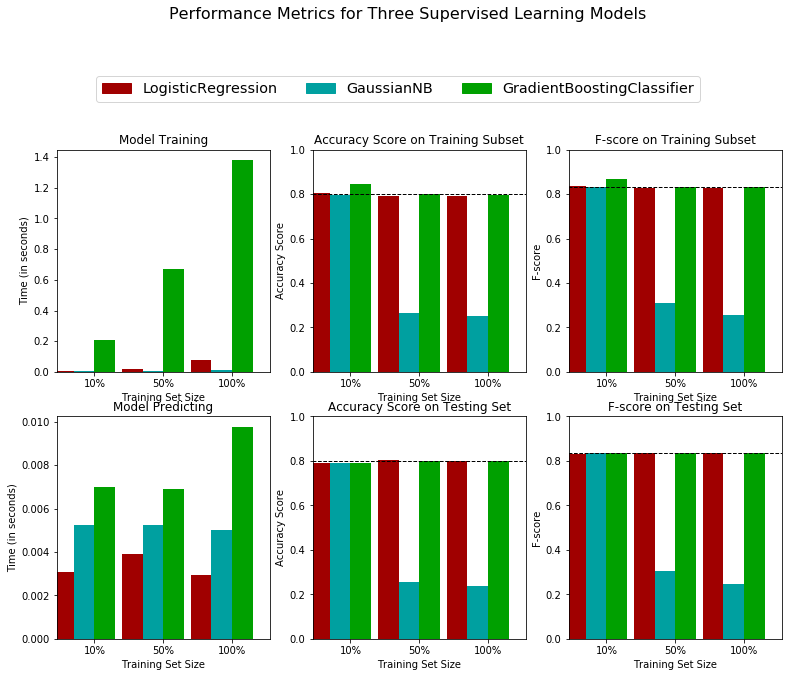

In [ ]:
# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

### Optimise

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# Create the parameters we want to tune
parameters = {'n_estimators': [10, 50, 300], 'learning_rate': [0.1], 'max_depth': [6], 'min_samples_split': [100], 'warm_start': [True], 'subsample': [0.8], 'min_samples_leaf': [40]} 
    
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(grid_fit.best_estimator_.get_params)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)>
Unoptimized model
------
Accuracy score on testing data: 0.8012
F-score on testing data: 0.8346

Optimized Model
------
Final accuracy score on the testing data: 0.8012
Final F-score on the testing data: 0.8344


### Feature importances

In [ ]:
def feature_plot(importances, X_train, y_train):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

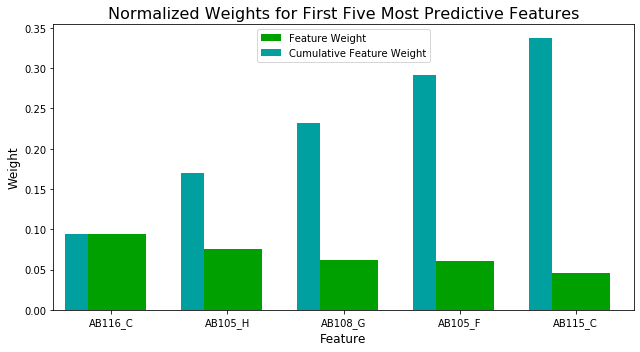

In [ ]:
# Extract the feature importances 
importances = best_clf.feature_importances_ 

# Plot
feature_plot(importances, X_train, y_train)

### Modelling summary - all features

- Models failed to improve beyond benchmark on 100% of data
- Naive Bayes peformed worst, logistic and Grad Boost equal best
- Grad boost might be 'overfitting' on 10% of data
- Top 5 features for Grad Boost: AB116_C, AB105_H, AB108_G, AB105_F, AB115_C

## Predictive Modelling Part 2 - Chi-squared features

### Split data into train & test

In [ ]:
# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X_chiSquared, y, test_size = 0.2, random_state = 0)

### Modelling

In [ ]:
# Initialize the three models
clf_A = linear_model.LogisticRegression()
clf_B = GaussianNB()
clf_C = GradientBoostingClassifier()

# Calculate the number of samples for 10%, 50% and 100% of the training data
samples_100 = len(y_train)
samples_50 = int((samples_100 / 100) * 50)
samples_10 = int((samples_100 / 100) * 10)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 597 samples.
LogisticRegression trained on 2988 samples.
LogisticRegression trained on 5976 samples.
GaussianNB trained on 597 samples.
GaussianNB trained on 2988 samples.
GaussianNB trained on 5976 samples.
GradientBoostingClassifier trained on 597 samples.
GradientBoostingClassifier trained on 2988 samples.
GradientBoostingClassifier trained on 5976 samples.


### Evaluate

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


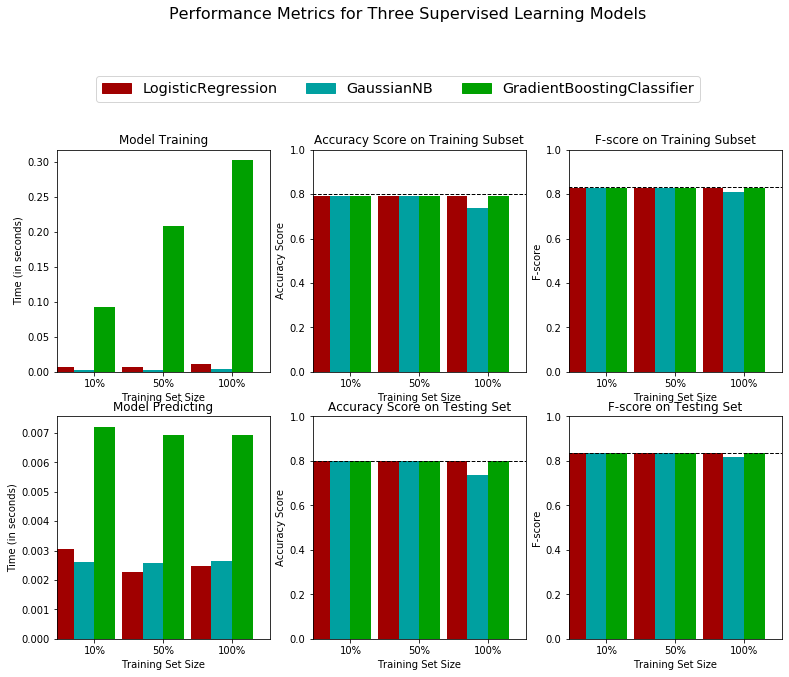

In [ ]:
# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

### Optimise

In [ ]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# Create the parameters we want to tune
parameters = {'n_estimators': [10, 50, 300], 'learning_rate': [0.1], 'max_depth': [6], 'min_samples_split': [100], 'warm_start': [True], 'subsample': [0.8], 'min_samples_leaf': [40]} 
    
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(grid_fit.best_estimator_.get_params)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)>
Unoptimized model
------
Accuracy score on testing data: 0.8012
F-score on testing data: 0.8344

Optimized Model
------
Final accuracy score on the testing data: 0.8012
Final F-score on the testing data: 0.8344


### Feature importances

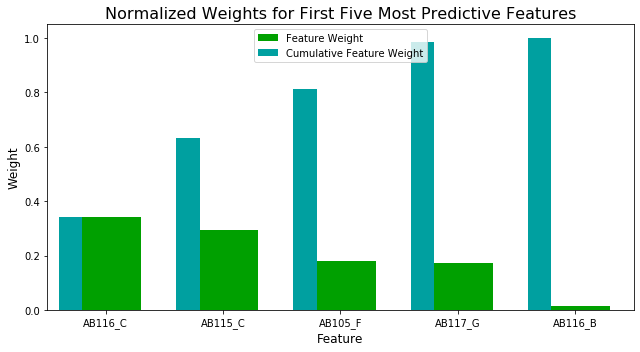

In [ ]:
# Extract the feature importances 
importances = best_clf.feature_importances_ 

# Plot
feature_plot(importances, X_train, y_train)

### Modelling summary - Chi-squared features

- Models failed to improve beyond benchmark on 100% of data
- Naive Bayes peformed slightly below logistic and Grad Boost equal best
- Grad boost does not 'overfit' for 10% data on train
- Top 5 features for Grad Boost: AB116_C, AB115_C, AB105_F, AB117_G, AB116_B

## Feature summary

### Most promising features

**Exploratory analysis**

- AB104
- AB105_A
- AB105_F
- AB116_G
- AB116_C
- AB116_F
- AB117_H
- AB117_F
- AB117_G

**Chi-squared selection**

- AB116_C
- AB115_C
- AB105_F
- AB117_G
- AB116_B

**Gradient boost model - all features**

- AB116_C
- AB105_H
- AB108_G
- AB105_F
- AB115_C

**COMMON**

- AB116_C
- AB105_F

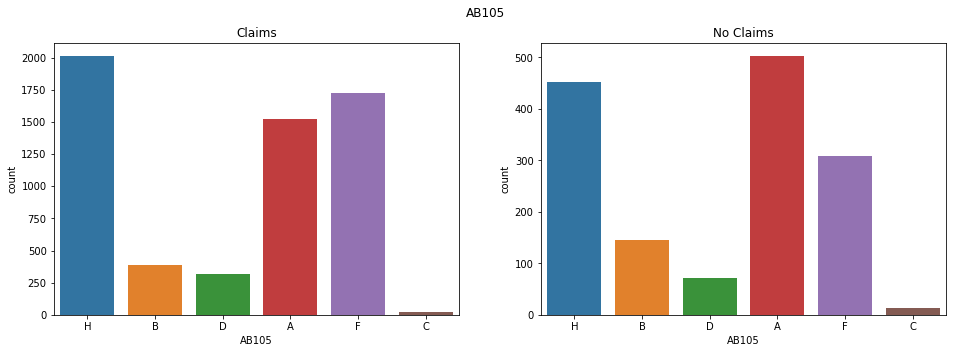

In [ ]:
# Create claims & no-claims sub-groups (pre dummies)
claims_df = no_dummies_df[no_dummies_df['Target'] == 1]
noclaims_df = no_dummies_df[no_dummies_df['Target'] == 0]
# Reset main df to exploratory
car_insurance_df = exploratory_df
# Compare distribution of values for AB105
compare_columns_claims('AB105')

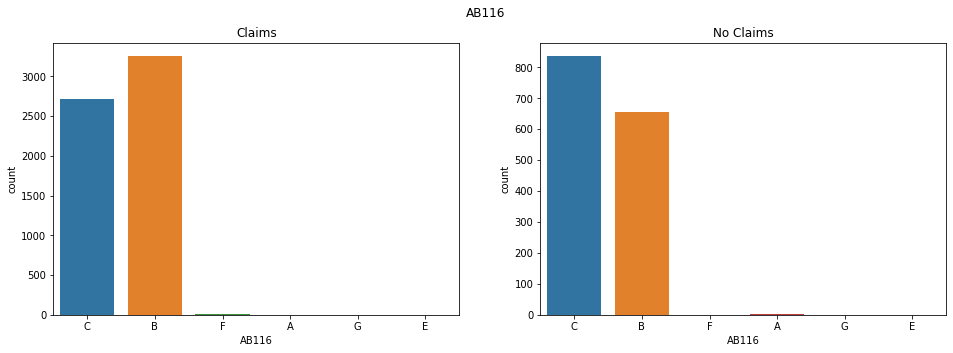

In [ ]:
# Compare distribution of values for AB105
compare_columns_claims('AB116')

## Modelling summary

| Metric | Benchmark Model | Optimized Model - All Features | Optimized Model - Chi-squared Features|
| --- | --- | --- | --- |
| Accuracy Score | 0.8000 | 0.8012 | 0.8012 |
| F-score | 0.8333 | 0.8344 | 0.8344 |


## Conclusion

- **Little difference in behaviour between customers who claim/don't claim for given features** i.e. distributions of values for features very similar
- **Target feature distribution odd** - on assumption that for Target feature 1 means claimed, 0 means no claim: 80% claims seems problematic, possible reasons a) Errors in data b) dataset sample not representitive of population
- **Models struggled to get beyond benchmark for target** - not surprising given feature distributions so similar for class/targets
- **Would question validity of dataset** - t-sne plot and almost perfect fit of distribution sub-classes might even suggest a synthetic/simulated dataset? but could also be set of behaviour features that are the same for claims vs no-claims customers.

## Further steps

- Question data source & validity
- See if more data available (of same features)
- See if feature descriptions available, would help understanding & also if categorical also ordinal might help predict better
- See if more data available (of new features)
- Further modelling using unsupervised/clustering techniques might provide more understading of relationships and clusters could be useful additional features themselves for target